# Анализ данных интернет-магазина «Стримчик»

**Описание проекта:** В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследование:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
- Подготовка данных. Загрузка и изучение информации из представленного датасета
- Предобработка данных. Обработка пропущенных данных, дубликатов, типов данных и т.д.
- Исследовательский анализ. Изучение основных параметров объектов, их распределения, зависимости.
- Составление портретов пользователей каждого региона. Определить для каждого региона самые популярные платформы и жанры.
- Проверка гипотез. На основе обработанных данных, сравнить оценки пользователей для разных платформ и жанров.

**Общий вывод:**
- Не за все периоды важны данные. С 1980 - 1993 игр выходило мало
- 5 лет для перехода между поколениями (PS2 -> PS3). По этим данным можно предположить что у платформ срок равен примерно 10 лет.
- Игры для платформ нового поколения, за этот период, имеют выше медианные продажи, чем игры для старого поколения (PS4 -> PS3, X360 -> XOne). У PS3 самый большой разброс продаж. XOne и 3DS имеют стабильные продажи, чем остальные платформы.
- Корреляции между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами - слабая положительная
- Наиболее прибыльные жанры — это Shooter, Sports, Role-Playing, тогда как жанры типа Puzzle и Adventure имеют относительно низкий коммерческий успех.
- Для NA и EU регионов платформы совпадают по популярности, в JP регионе популярнее WiiU и PSV, чем X360 и XOne.
- В NA и EU пользователи предпочитают почти одни и те же жанры, кроме Misc для NA, Racing для EU. Для JP пользователи предпочтительней Fighting, Misc. Жанры Action, Role-Playing почти одинаково популярны для всех пользователей.
- Для регионов NA и EU наблюдается средняя корреляция с рейтингом ESRB, а в JP регионе нет корреляции вовсе.
- Результаты проверки гипотез

    - Мы можем утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Мы можем утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.

**Рекомендации:** Успешность игры в определенном регионе зависит в первую очередь от жанра и рейтинга ESRB. Меньше влияют оценки критиков. Оценки пользователей никак не коррелируют с продажами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Подготовка данных

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцы `Critic_Score`, `User_Score`, `Rating` имеют почти половину пропусков

In [4]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Переменные, содержащие информацию о продажах, имеют большое количество нулевых значений. Возможно количество проданных копий было сильно меньше 1 миллиона.

In [5]:
games.describe(include='object').T

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


Самым частым значением у `User_Score` является tbd (To Be Determined) - подлежит уточнению. Его надо обработать.

In [6]:
games.duplicated().sum()

0

**Выводы:** 

Нужно привести названия столбцов к нижнему регистру

Есть несоответствия по типам данных, например, `Year_of_Release` имеет тип `float` хотя должен быть `int`

Столбцы `Critic_Score`, `User_Score`, `Rating` имеют почти половину пропусков, которые нужно обработать

Полных дубликатов нет

### Предобработка данных

#### Изменение названий столбцов (к нижнему регистру);

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Изменение типов данных

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

- тип `user_score` будет изменен в 2.4 

#### Обработка пропусков

In [10]:
games.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
Name: nans, dtype: int64

- `genre`, `name`

In [11]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих строчках `name` и, `genre` и имеют `NaN` значения. Хотя они были выпущены в 1993 и в общем продались мало, так что можно их удалить

Причины: возможно только для игр этой платформы и этого года выпуска есть пропуски?

In [12]:
games.query('platform == "GEN" & year_of_release == 1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку есть игры на платформе GEN выпущенные в 1993 году вряд ли тогда это системная ошибка, возможно это случайные пропуски

In [13]:
games.dropna(subset=['name'], inplace=True)
games[games['name'].isna()]['name'].count()

0

- `critic_score`

In [14]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Попробуем посчитать строки, где сразу `critic_score`, `user_score`, `rating` имеют `nan`

In [15]:
games[games['critic_score'].isna() & games['user_score'].isna() & games['rating'].isna()]['name'].count()

6619

6619 строк с пропущенными значениями сразу в 3-х столбцах. Поскольку нельзя достоверно заполнить пропуски, мы их оставляем.

In [16]:
games.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

year_of_release     269
critic_score       8576
user_score         6699
rating             6764
Name: nans, dtype: int64

#### Обработка значения `tbd` в `user_score`


Самым частым значением у user_score является tbd (To Be Determined) - подлежит уточнению. (из п.1)
Поскольку tbd никак нормально интерпретировать нельзя, заменим его на NaN

In [17]:
games['user_score'] = games['user_score'].replace('tbd', None)
games['user_score'].value_counts() # это количественная переменная, но value_counts() теперь не показывает `tbd` с 2400 повторениями

7.8    388
8.2    337
8      333
7.5    293
8.3    292
      ... 
0.5      2
9.6      2
0.3      2
1.5      2
0        1
Name: user_score, Length: 95, dtype: int64

Изменение типа данных 

In [18]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].dtype

dtype('float64')

#### Расчет суммарных продаж во всех регионах и запишите их в отдельный столбец.

In [19]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [20]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


**Выводы:** 

Исправлены названия столбцов

Пропуски в `genre` и `name` удалены (всего 2 строчки)

Пропуски в `user_score`, `critic_score`, `rating` не заполнены, так как их нельзя достоверно восстановить

Добавлен столбец `total_sales` - сумма всех продаж для каждой игры

Причины пропусков могут быть следующие: 
- игра плохо продалась и о ней мало кто знает
- игра давно выпущена
- игра выпущена на платформу, утратившую популярность

### Исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы.

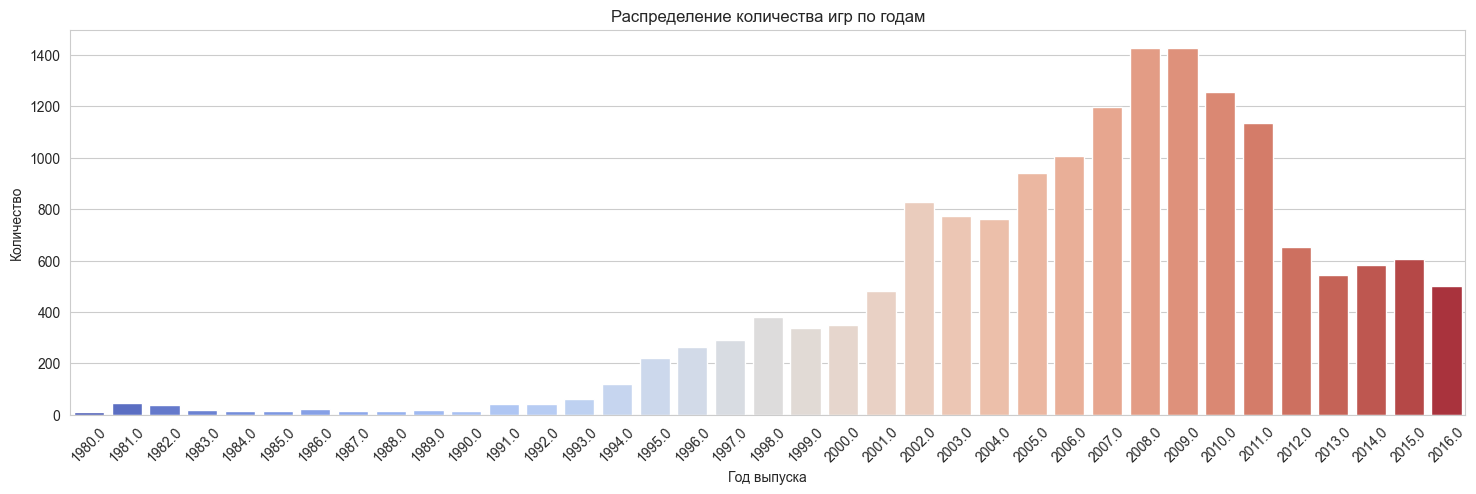

In [21]:
# Агрегированные данные
games_per_year = games['year_of_release'].value_counts().reset_index()
games_per_year.columns = ['year_of_release', 'count']

# Построение графика
plt.figure(figsize=(18, 5))
sns.barplot(data=games_per_year, x='year_of_release', y='count', palette='coolwarm')

plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества игр по годам')
plt.xticks(rotation=45)
plt.show()

**Вывод:** Не за все периоды важны данные. С 1980 - 1993 игр выходило мало.

- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [22]:
top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms.head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [23]:
# Фильтруем данные только по этим платформам (первые 5)
games_top_platforms = games[games['platform'].isin(top_platforms[0:5].index)]
# Группируем данные из этих платформ по годам и считаем суммарные продажи
games_top_platforms = games_top_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

games_top_platforms.head()

,platform,year_of_release,total_sales
0,DS,1985.0,0.02
1,DS,2004.0,17.27
2,DS,2005.0,130.14
3,DS,2006.0,119.81
4,DS,2007.0,146.94


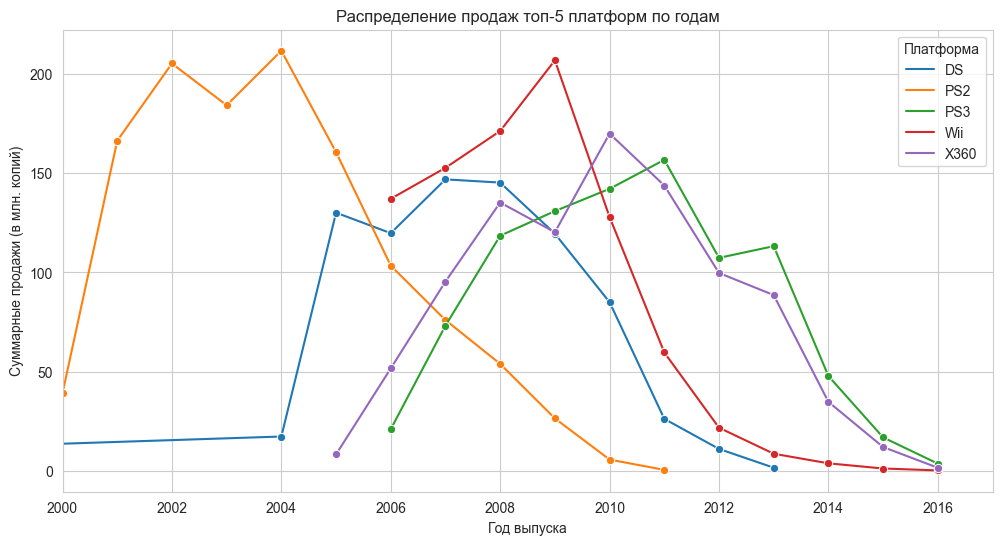

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=games_top_platforms, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.xlabel('Год выпуска')
plt.xlim(2000, 2017)
plt.ylabel('Суммарные продажи (в млн. копий)')
plt.title('Распределение продаж топ-5 платформ по годам')
plt.legend(title='Платформа')
plt.grid(True)

plt.show()

**Вывод:** 5 лет для перехода между поколениями (PS2 -> PS3). Там где уже находится пик продаж PS3 (2011), продажи PS2 упали до 0. По этим данным можно предположить что у платформ срок равен примерно 10 лет.

- Возьмем данные за соответствующий актуальный период с 2012 до 2016 года, как раз когда произошел спад продаж.

In [25]:
actual_season = [2012, 2016]
games_actual = games.query('@actual_season[0] <= year_of_release <= @actual_season[1]')
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


- Посмотрим какие платформы лидируют по продажам, растут или падают.

In [26]:
# Группируем данные из этих платформ по годам и считаем суммарные продажи
top_platforms_actual = games_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

top_platforms_actual['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'], dtype=object)

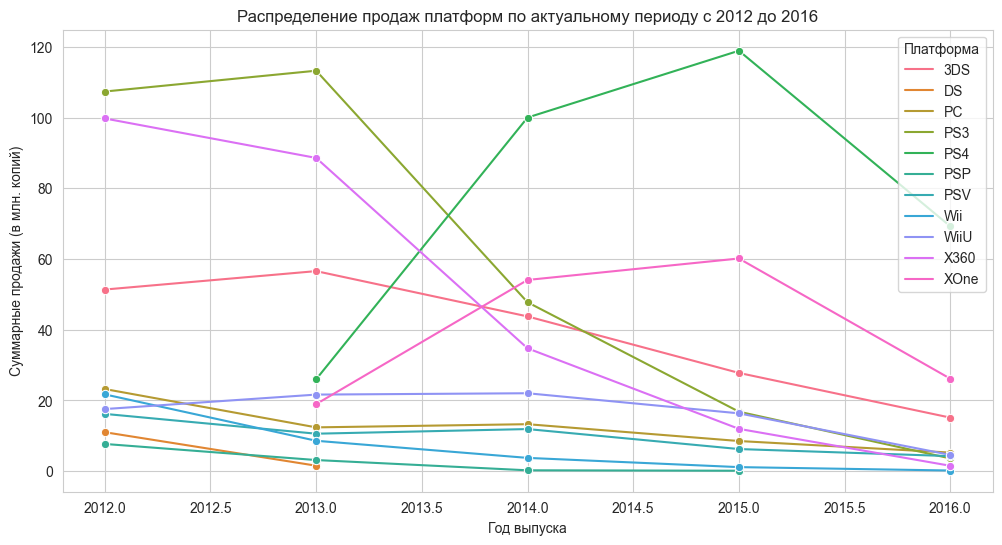

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_platforms_actual, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в млн. копий)')
plt.title('Распределение продаж платформ по актуальному периоду с 2012 до 2016')
plt.legend(title='Платформа')
plt.grid(True)

plt.show()

- Выберем несколько потенциально прибыльных платформ.

In [28]:
profitable_platform = top_platforms_actual.groupby('platform')['total_sales'].sum().nlargest(5)
profitable_platform

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

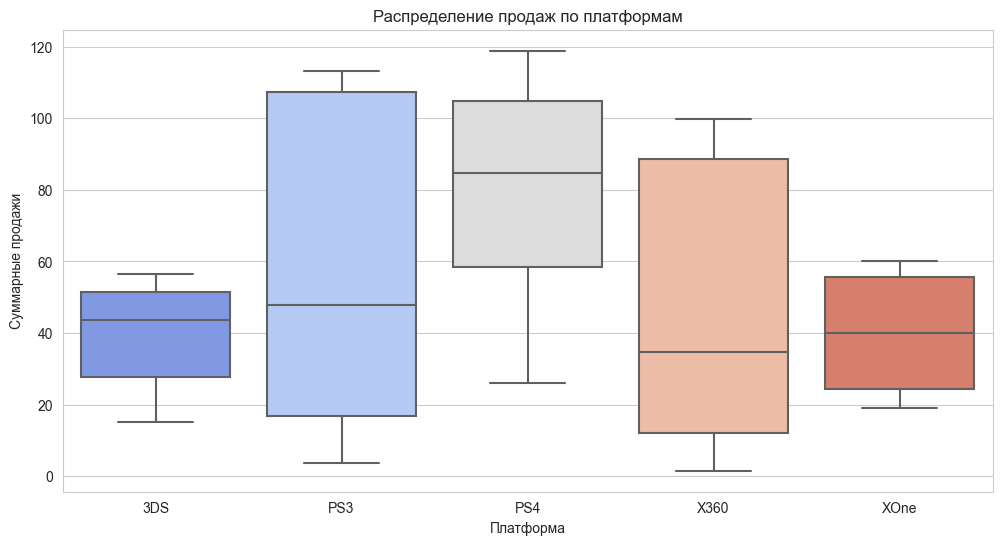

In [29]:
# Фильтруем платформы с наибольшими продажами
top_platforms_actual = top_platforms_actual[top_platforms_actual['platform'].isin(profitable_platform.index)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_platforms_actual, x='platform', y='total_sales', palette='coolwarm')

plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.title('Распределение продаж по платформам')

plt.show()

**Вывод:** Игры для платформ нового поколения, за этот период, имеют выше медианные продажи, чем игры для старого поколения (PS4 -> PS3, X360 -> XOne). У PS3 самый большой разброс продаж. XOne и 3DS имеют стабильные продажи, чем остальные платформы.

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [30]:
def plot_scatter(df, column, x_label):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=column, y='total_sales', alpha=0.5)

    plt.xlabel(x_label)
    plt.ylabel('Суммарные продажи (в млн. копий)')
    plt.title('Зависимость оценок от продаж')

    plt.grid(True)
    plt.show()

In [31]:
def check_corr(platform_name, draw=True):
    df = games_actual.query('platform == @platform_name')
    if draw:
        plot_scatter(df, 'user_score', 'Оценки пользователей')
        plot_scatter(df, 'critic_score', 'Оценки критиков')

    print(f'Корреляция между оценками пользователей и продажами: {df["user_score"].corr(df["total_sales"]):.2f}')
    print(f'Корреляция между оценками критиков и продажами: {df["critic_score"].corr(df["total_sales"]):.2f}')
    

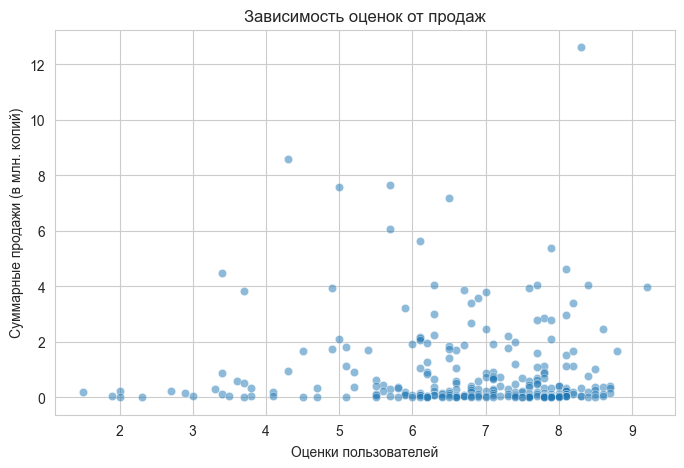

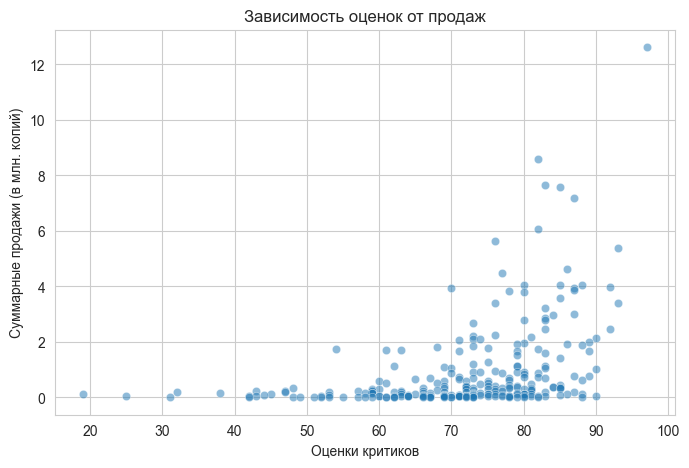

Корреляция между оценками пользователей и продажами: -0.03
Корреляция между оценками критиков и продажами: 0.41


In [32]:
check_corr('PS4')

**Вывод:** Корреляции между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами - средняя положительная

- Соотнесем вывод с продажами игр на других платформах.

In [33]:
check_corr('PS3', draw=False)

Корреляция между оценками пользователей и продажами: -0.01
Корреляция между оценками критиков и продажами: 0.33


In [34]:
check_corr('X360', draw=False)

Корреляция между оценками пользователей и продажами: 0.01
Корреляция между оценками критиков и продажами: 0.36


In [35]:
check_corr('XOne', draw=False)

Корреляция между оценками пользователей и продажами: -0.07
Корреляция между оценками критиков и продажами: 0.42


In [36]:
check_corr('3DS', draw=False)

Корреляция между оценками пользователей и продажами: 0.20
Корреляция между оценками критиков и продажами: 0.32


**Вывод:** для каждой популярной платформы сохраняется корреляции с отзывами.

- Посмотрим на общее распределение игр по жанрам

In [37]:
games_genre = games_actual.groupby('genre').agg(
    count=('genre', 'count'), 
    sum_sales=('total_sales', 'sum'), 
    mean_sales=('total_sales','mean'), 
    median_sales=('total_sales', 'median')
).reset_index()
games_genre.head()

,genre,count,sum_sales,mean_sales,median_sales
0,Action,1031,441.12,0.427856,0.12
1,Adventure,302,29.43,0.097450,0.03
2,Fighting,109,44.49,0.408165,0.13
3,Misc,192,85.04,0.442917,0.12
4,Platform,85,61.00,0.717647,0.21


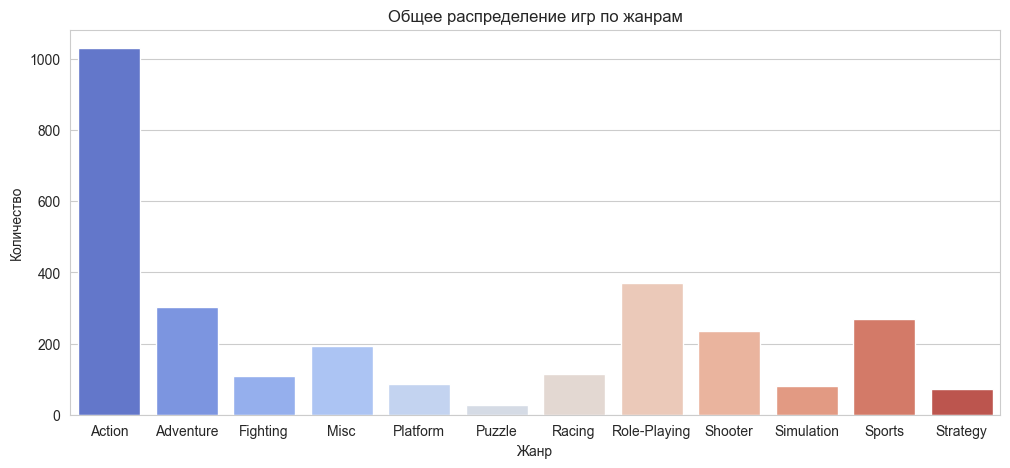

In [38]:
plt.figure(figsize=(12, 5))
sns.barplot(data=games_genre, x='genre', y='count', palette='coolwarm')

plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.title('Общее распределение игр по жанрам')

plt.show()

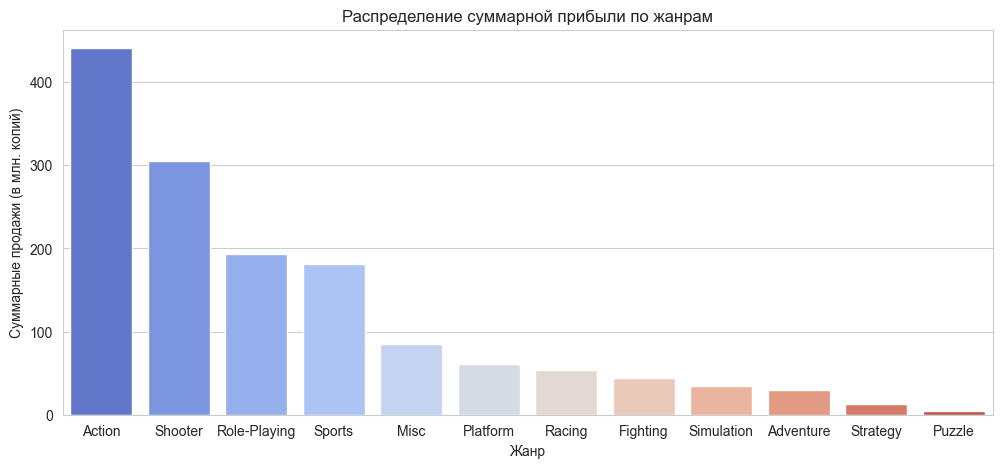

In [39]:
plt.figure(figsize=(12, 5))
sns.barplot(data=games_genre.sort_values(by='sum_sales', ascending=False), x='genre', y='sum_sales', palette='coolwarm')

plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (в млн. копий)')
plt.title('Распределение суммарной прибыли по жанрам')

plt.show()

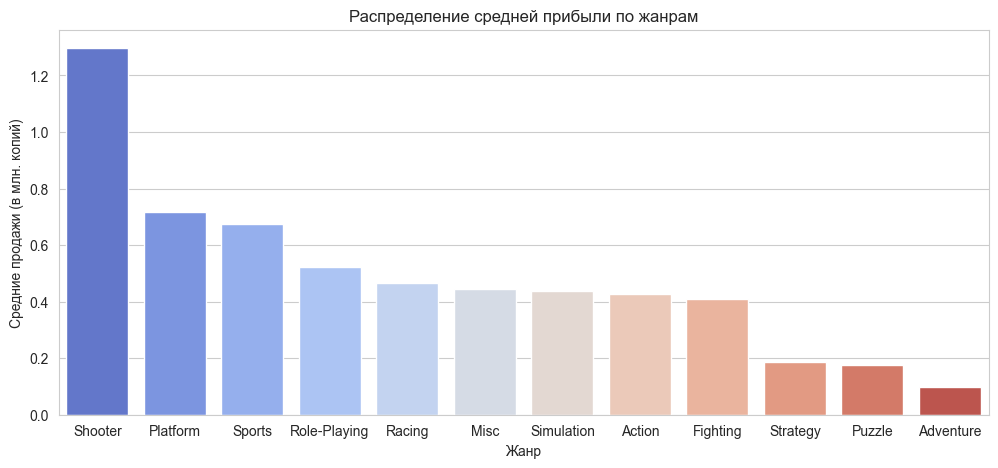

In [40]:
plt.figure(figsize=(12, 5))
sns.barplot(data=games_genre.sort_values(by='mean_sales', ascending=False), x='genre', y='mean_sales', palette='coolwarm')

plt.xlabel('Жанр')
plt.ylabel('Средние продажи (в млн. копий)')
plt.title('Распределение средней прибыли по жанрам')

plt.show()

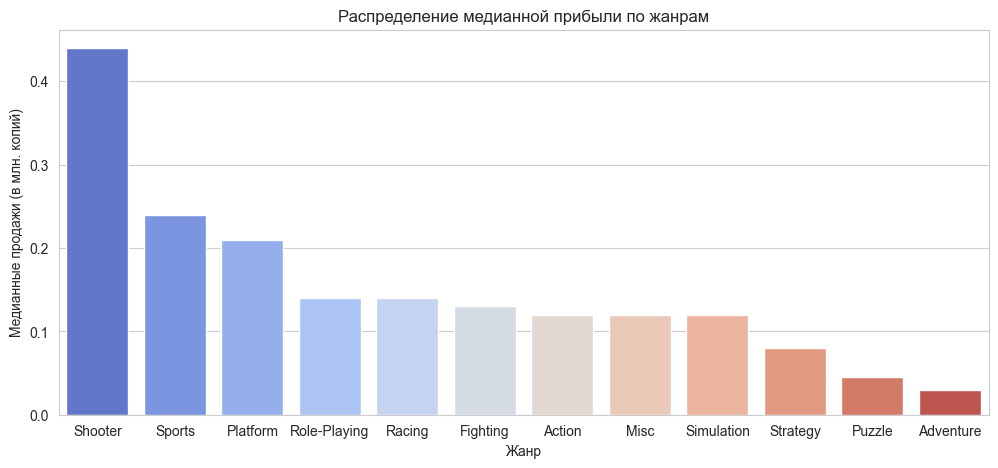

In [41]:
plt.figure(figsize=(12, 5))
sns.barplot(data=games_genre.sort_values(by='median_sales', ascending=False), x='genre', y='median_sales', palette='coolwarm')

plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (в млн. копий)')
plt.title('Распределение медианной прибыли по жанрам')

plt.show()

Наиболее прибыльные жанры — это Shooter, Sports, Role-Playing, тогда как жанры типа Puzzle и Adventure имеют относительно низкий коммерческий успех.

**Выводы:**

Не за все периоды важны данные. С 1980 - 1993 игр выходило мало

5 лет для перехода между поколениями (PS2 -> PS3). Там где уже находится пик продаж PS3 (2011), продажи PS2 упали до 0. По этим данным можно предположить что у платформ срок равен примерно 10 лет.

Игры для платформ нового поколения, за этот период, имеют выше медианные продажи, чем игры для старого поколения (PS4 -> PS3, X360 -> XOne). У PS3 самый большой разброс продаж. XOne и 3DS имеют стабильные продажи, чем остальные платформы.

Корреляции между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами - средняя положительная

Наиболее прибыльные жанры — это Shooter, Sports, Role-Playing, тогда как жанры типа Puzzle и Adventure имеют относительно низкий коммерческий успех.

### Портреты пользователей для каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [42]:
def make_chart(df, column, title, group):
    df_top = df.sort_values(by=column, ascending=False)[0:5]
    df_top['part'] = df_top['na_sales'] / df_top['total_sales']
    
    plt.pie(df_top['part'], labels=df_top[group], autopct="%1.1f%%")
    plt.title(title)
    plt.show()

In [43]:
platform_sales = games_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index()
platform_sales

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,55.31,42.64,87.79,194.61
1,DS,4.59,3.53,3.72,12.55
2,PC,19.12,37.76,0.00,62.65
3,PS3,103.38,106.86,35.29,288.79
4,PS4,108.74,141.09,15.96,314.14
5,PSP,0.13,0.42,10.47,11.19
6,PSV,10.98,11.36,21.04,49.18
7,Wii,17.45,11.92,3.39,35.37
8,WiiU,38.10,25.13,13.01,82.19
9,X360,140.05,74.52,1.57,236.54


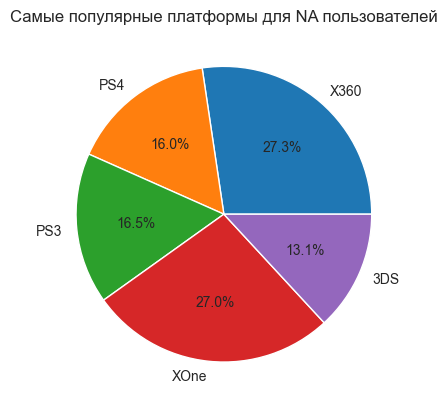

In [44]:
make_chart(platform_sales, 'na_sales', 'Самые популярные платформы для NA пользователей', 'platform')

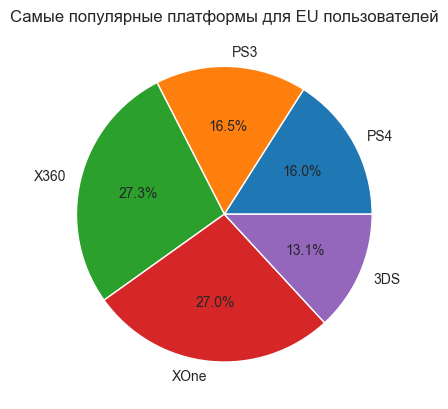

In [45]:
make_chart(platform_sales, 'eu_sales', 'Самые популярные платформы для EU пользователей', 'platform')

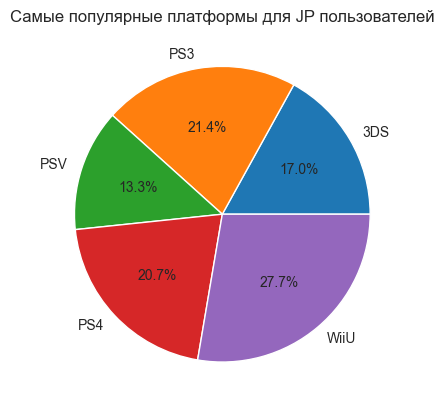

In [46]:
make_chart(platform_sales, 'jp_sales', 'Самые популярные платформы для JP пользователей', 'platform')

**Выводы:** Для NA и EU регионов платформы совпадают по популярности, в JP регионе популярнее `WiiU` и `PSV`, чем `X360` и `XOne`.

Самые популярные жанры (топ-5). Поясните разницу.

In [47]:
genre_sales = games_actual.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index()
genre_sales.head()

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,177.84,159.34,52.80,441.12
1,Adventure,8.92,9.46,8.24,29.43
2,Fighting,19.79,10.79,9.44,44.49
3,Misc,38.19,26.32,12.86,85.04
4,Platform,25.38,21.41,8.63,61.00


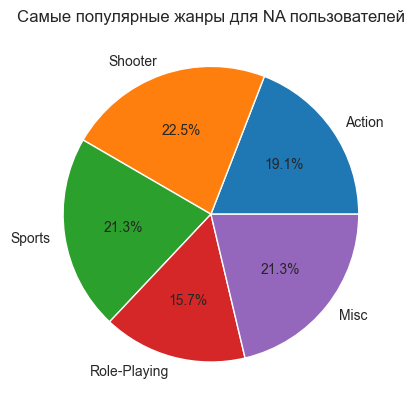

In [48]:
make_chart(genre_sales, 'na_sales', 'Самые популярные жанры для NA пользователей', 'genre')

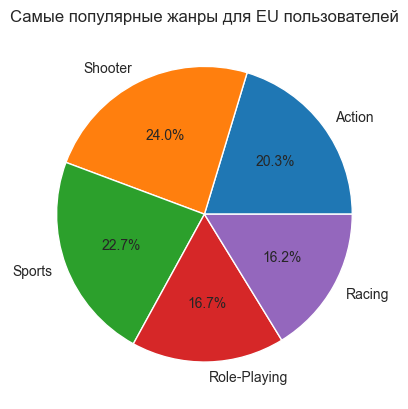

In [49]:
make_chart(genre_sales, 'eu_sales', 'Самые популярные жанры для EU пользователей', 'genre')

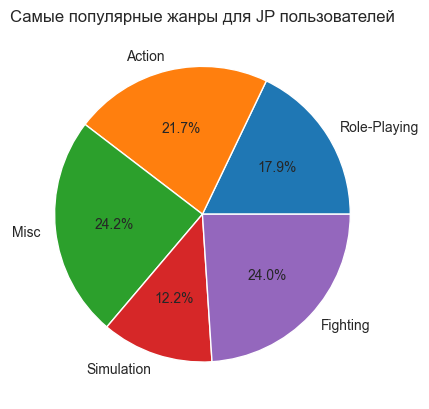

In [50]:
make_chart(genre_sales, 'jp_sales', 'Самые популярные жанры для JP пользователей', 'genre')

**Выводы:** В NA и EU пользователи предпочитают почти одни и те же жанры, кроме `Misc` для NA, `Racing` для EU. Для JP пользователи предпочтительней `Fighting`, `Misc`. Жанры `Action`, `Role-Playing` почти одинаково популярны для всех пользователей. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
esrb = games_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index()
esrb.head()

,rating,na_sales,eu_sales,jp_sales,total_sales
0,E,114.37,113.03,28.33,287.17
1,E10+,75.70,55.37,8.19,155.49
2,M,231.57,193.96,21.20,510.11
3,T,66.02,52.96,26.02,162.94


Посчитаем корреляцию между рейтингом и продажами. Преобразуем ESRB-рейтинг в числовой формат для расчета корреляции

In [52]:
rating_mapping = {'E': 1, 'E10+': 2, 'T': 3, 'M': 4}
esrb['rating_numeric'] = esrb['rating'].map(rating_mapping)

correlation = esrb[['rating_numeric', 'na_sales', 'eu_sales', 'jp_sales']].corr()
print(f"Корреляция между рейтингом ESRB и продажами:\n{correlation['rating_numeric']}")

Корреляция между рейтингом ESRB и продажами:
rating_numeric    1.000000
na_sales          0.580590
eu_sales          0.468831
jp_sales         -0.051061
Name: rating_numeric, dtype: float64


**Вывод:** Для регионов NA и EU наблюдается средняя положительная корреляция с рейтингом ESRB, а в JP регионе нет корреляции вовсе.

**Выводы:** 

Для NA и EU регионов платформы совпадают по популярности, в JP регионе популярнее WiiU и PSV, чем X360 и XOne.

В NA и EU пользователи предпочитают почти одни и те же жанры, кроме Misc для NA, Racing для EU. Для JP пользователи предпочтительней Fighting, Misc. Жанры Action, Role-Playing почти одинаково популярны для всех пользователей.

Для регионов NA и EU наблюдается средняя корреляция с рейтингом ESRB, а в JP регионе нет корреляции вовсе.

### Проверка гипотез

In [53]:
def check_h(sample1, sample2, alpha=0.05):
    results = st.ttest_ind(sample1.dropna(), sample2.dropna())
    
    print('P-value =', results.pvalue)
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Отвергнуть нулевую гипотезу не удалось')
        

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


- **Нулевая гипотеза** - средние пользовательские рейтинги Xbox One == средние пользовательские рейтинги PC 
- **Альтернативная гипотеза** - средние пользовательские рейтинги Xbox One != средние пользовательские рейтинги PC

In [54]:
check_h(games_actual.query("platform == 'XOne'")['user_score'], games_actual.query("platform == 'PC'")['user_score'])

P-value = 0.5747220188229722
Отвергнуть нулевую гипотезу не удалось


**Выводы:** Мы можем утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- **Нулевая гипотеза** - средние пользовательские рейтинги Action == средние пользовательские рейтинги Sports 
- **Альтернативная гипотеза** - средние пользовательские рейтинги Action != средние пользовательские рейтинги Sports

In [55]:
check_h(games_actual.query("genre == 'Action'")['user_score'], games_actual.query("genre == 'Sports'")['user_score'])

P-value = 1.048598937143916e-23
Отвергаем нулевую гипотезу


**Выводы:** Мы можем утверждать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Общий вывод

1) Столбцы Critic_Score, User_Score, Rating имеют почти половину пропусков, которые нужно обработать

2) Полных дубликатов нет

3) Не за все периоды важны данные. С 1980 - 1993 игр выходило мало

4) 5 лет для перехода между поколениями (PS2 -> PS3). Там где уже находится пик продаж PS3 (2011), продажи PS2 упали до 0. По этим данным можно предположить что у платформ срок равен примерно 10 лет.

5) Игры для платформ нового поколения, за этот период, имеют выше медианные продажи, чем игры для старого поколения (PS4 -> PS3, X360 -> XOne). У PS3 самый большой разброс продаж. XOne и 3DS имеют стабильные продажи, чем остальные платформы.

6) Корреляции между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами - слабая положительная

7) Наиболее прибыльные жанры — это Action и Shooter, тогда как жанры типа Puzzle и Strategy имеют относительно низкий коммерческий успех.

8) Для NA и EU регионов платформы совпадают по популярности, в JP регионе популярнее WiiU и PSV, чем X360 и XOne.

9) В NA и EU пользователи предпочитают почти одни и те же жанры, кроме Misc для NA, Racing для EU. Для JP пользователи предпочтительней Fighting, Misc. Жанры Action, Role-Playing почти одинаково популярны для всех пользователей.

10) Для регионов NA и EU наблюдается средняя корреляция с рейтингом ESRB, а в JP регионе нет корреляции вовсе.

11) Результаты проверки гипотез
    
    - Мы можем утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Мы можем утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.
    
**Рекомендации:** Успешность игры в определенном регионе зависит в первую очередь от жанра и рейтинга ESRB. Наблюдается средняя положительная корреляция на продажи от оценки критиков. Оценки пользователей никак не коррелируют с продажами.